# 필요 라이브러리 설치

In [ ]:
!pip install seaborn

In [ ]:
pip install scipy

In [ ]:
pip install statsmodels

In [ ]:
pip install scikit-learn

# 1. 데이터 로드 및 구조 확인

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

# 2. 기술통계량

* Species별 Petal Length의 평균, 개수, 표준편차, 최소/최대, 사분위수 등을 출력하고 그룹별 데이터 개수를 확인하시오.

In [2]:
iris.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [3]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 3. 시각화

* Species별 Petal Length의 분포를 Boxplot으로 시각화 하시오.
* 간단한 해석 작성

<Axes: xlabel='species', ylabel='petal_length'>

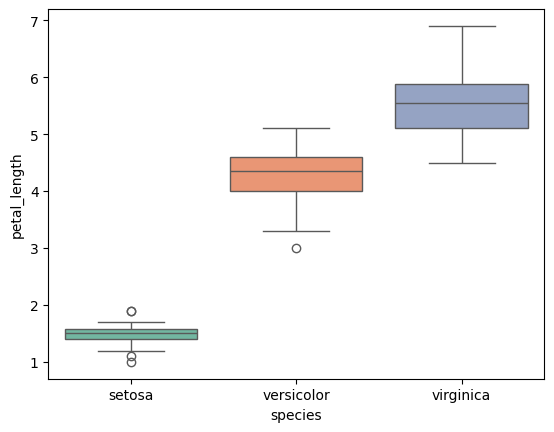

In [4]:
import matplotlib.pyplot as plt

sns.boxplot(x='species', y='petal_length', data=iris, hue='species', palette='Set2', legend=False)

## 간단한 해석
* 세가지 종 중 Setosa 종의 Petal Length(꽃잎 길이)가 평균 1.46cm로 가장 짧으며, 분포 범위가 매우 좁고 일정합니다. 특히 나머지 두 종 Versicolor, Virginica과는 분포가 겹치지 않아 Petal Length 칼럼 하나만으로 Setosa 종을 분류할 수 있습니다.
* Setosa 종과 달리 Versicolor 종과 Virginica 종은 분산이 크며 두 종간 분포도 겹치는 특징이 있습니다.

# 4. 정규성 검정 (Shapiro-Wilk)

* Species별로 Shapiro-Wilk 검정을 실시하시오. (해당 검정에 대한 가설 수립 포함)
* 각 species별 p-value 출력하고, 0.05를 기준으로 해석하시오.  
    (단, 이후 분석은 정규성을 만족한다고 가정한다.)  
    (Hint: scipy.stats.shapiro() 함수로 활용 가능)

## 가설 수립
* 귀무가설 ($H_0$): 해당 종의 Petal Length 데이터는 정규분포를 따른다.
* 대립가설 ($H_1$): 해당 종의 Petal Length 데이터는 정규분포를 따르지 않는다.

In [5]:
from scipy import stats

species_list = iris['species'].unique()

for species in species_list:
    # 해당 종의 데이터 필터링
    species_df = iris[iris['species'] == species]['petal_length']
    
    # Shapiro-Wilk 검정 수행
    statistic, p_value = stats.shapiro(species_df)
    
    # 결과 출력
    print(f"[{species}]")
    print(f"- Statistics: {statistic:.4f}, p-value: {p_value:.4f}")
    
    # 유의수준 0.05 기준 해석
    if p_value > 0.05:
        print("  -> 결과: 귀무가설(H0)을 기각할 수 없습니다. (데이터는 정규분포를 따른다고 볼 수 있습니다.)")
    else:
        print("  -> 결과: 귀무가설(H0)을 기각합니다. (데이터는 정규분포를 따르지 않는다고 볼 수 있습니다.)")
    print("-" * 40)

[setosa]
- Statistics: 0.9550, p-value: 0.0548
  -> 결과: 귀무가설(H0)을 기각할 수 없습니다. (데이터는 정규분포를 따른다고 볼 수 있습니다.)
----------------------------------------
[versicolor]
- Statistics: 0.9660, p-value: 0.1585
  -> 결과: 귀무가설(H0)을 기각할 수 없습니다. (데이터는 정규분포를 따른다고 볼 수 있습니다.)
----------------------------------------
[virginica]
- Statistics: 0.9622, p-value: 0.1098
  -> 결과: 귀무가설(H0)을 기각할 수 없습니다. (데이터는 정규분포를 따른다고 볼 수 있습니다.)
----------------------------------------


# 5. 등분산성 검정 (Levene)

* Levene 검정을 통해 3개 그룹 간 등분산성을 검정하시오.
* p-value를 출력하고, 0.05를 기준으로 해석하시오.  
  (단, 이후 분석은 등분산성을 만족한다고 가정한다.)  
  (Hint: scipy.stats.levene() 함수로 활용 가능)

## 가설 수립
* 귀무가설($H_0$): 세 가지 종의 꽃잎 길이(Petal Length) 분산은 모두 같다 (등분산성을 만족한다).
* 대립가설($H_1$): 적어도 한 종의 꽃잎 길이 분산은 나머지 종들과 다르다 (등분산성을 만족하지 않는다).

In [6]:
from scipy import stats

# 각 종별 Petal Length 데이터 추출
setosa_petal = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal = iris[iris['species'] == 'virginica']['petal_length']

# Levene 검정 실시
levene_stat, p_value_levene = stats.levene(setosa_petal, versicolor_petal, virginica_petal)

# 결과 출력
print("--- Levene’s Test Results ---")
print(f"Statistic: {levene_stat:.4f}")
print(f"p-value: {p_value_levene:.4e}") # 값이 매우 작을 수 있어 과학적 표기법 권장

# 유의수준 0.05 기준 해석
alpha = 0.05
if p_value_levene > alpha:
    print(f"결과: p-value({p_value_levene:.4f}) > {alpha}")
    print("-> 귀무가설을 기각할 수 없으므로, 세 그룹의 분산이 같다고 볼 수 있습니다. (등분산성 만족)")
else:
    print(f"결과: p-value({p_value_levene:.4e}) <= {alpha}")
    print("-> 귀무가설을 기각하므로, 세 그룹의 분산이 통계적으로 유의미하게 다릅니다. (등분산성 불만족)")

--- Levene’s Test Results ---
Statistic: 19.4803
p-value: 3.1288e-08
결과: p-value(3.1288e-08) <= 0.05
-> 귀무가설을 기각하므로, 세 그룹의 분산이 통계적으로 유의미하게 다릅니다. (등분산성 불만족)


# 6. ANOVA 가설 수립

## 가설 수립
* 귀무가설($H_0$): 세 species 간 Petal Length의 평균은 모두 같다.
* 대립가설($H_1$): 적어도 한 species의 Petal Length 평균은 다른 species와 다르다.

# 7. One-way ANOVA

In [7]:
from scipy import stats

# 7. One-way ANOVA 실시 
# 각 species별로 petal_length 데이터 그룹화
group_setosa = iris[iris['species'] == 'setosa']['petal_length']
group_versicolor = iris[iris['species'] == 'versicolor']['petal_length']
group_virginica = iris[iris['species'] == 'virginica']['petal_length']

# One-way ANOVA 수행
f_stat, p_val = stats.f_oneway(group_setosa, group_versicolor, group_virginica)

# F값, p-value 확인 
print(f"--- One-way ANOVA Result --")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4e}")  # p-value가 매우 작으므로 지수 표기법 사용

# 유의수준 0.05 기준으로 귀무가설 기각 여부 판단 
alpha = 0.05
if p_val < alpha:
    print(f"\n결과: p-value가 {alpha}보다 작으므로, 귀무가설(H0)을 기각합니다.")
    print("결론: 세 종 간 Petal Length에는 통계적으로 유의미한 차이가 존재합니다.")
else:
    print(f"\n결과: p-value가 {alpha}보다 크거나 같으므로, 귀무가설(H0)을 기각할 수 없습니다.")
    print("결론: 세 종 간 Petal Length에는 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.")

--- One-way ANOVA Result --
F-statistic: 1180.1612
p-value: 2.8568e-91

결과: p-value가 0.05보다 작으므로, 귀무가설(H0)을 기각합니다.
결론: 세 종 간 Petal Length에는 통계적으로 유의미한 차이가 존재합니다.


# 8. 사후검정 (Tukey HSD)

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 8. Tukey HSD 사후검정 실시
# endog: 분석 대상(petal_length), groups: 그룹 변수(species), alpha: 유의수준
tukey_result = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)

# 결과 출력
print("--- Tukey HSD Post-hoc Test Result ---")
print(tukey_result)

--- Tukey HSD Post-hoc Test Result ---
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


## 결과
* 3번의 비교에 대해서 모두 reject=True 이므로,  
  세 가지 모든 종 쌍(Pair) 사이에서 꽃잎 길이의 평균 차이가 유의미하게 나타납니다.

# 9. 결과 요약

Iris 데이터셋의 종별 꽃잎 길이(Petal Length) 차이를 분석한 결과는 다음과 같습니다:  
1. 시각적 분포 (Boxplot): 세 종의 데이터 분포가 겹치지 않고 확연히 구분되는 것을 확인했습니다. 특히 Setosa는 매우 짧고 조밀한 분포를 보인 반면, Virginica는 가장 길고 넓은 분포를 나타냈습니다.  
2. 통계적 유의성 (ANOVA): 일원 분산 분석 결과, p-value가 유의수준 0.05보다 매우 작게($2.8568 \times 10^{-91}$) 나타나 세 종 간의 평균 차이가 통계적으로 매우 유의미함을 확인했습니다.
3. 사후 비교 (Tukey HSD): 모든 종 쌍(setosa-versicolor, setosa-virginica, versicolor-virginica) 간의 비교에서 유의미한 차이가 발견되었습니다.  
## 결론 (Conclusion)  
통계적으로 검정한 결과, Setosa 종의 꽃잎 길이가 가장 짧고, Virginica 종의 꽃잎 길이가 가장 길다고 결론지을 수 있습니다. 평균값의 크기 순서는 Setosa < Versicolor < Virginica 순으로 통계적으로 유의하게 증가합니다.

# 10. 회귀 분석

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. 입력 데이터(X)와 타겟 데이터(y) 설정
X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']

# 2. Train/Test 데이터 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. 결과 출력
print("--- Linear Regression Result --")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print("\nCoefficients (회귀계수):")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.4f}")
print(f"Intercept (절편): {model.intercept_:.4f}")

--- Linear Regression Result --
MSE: 0.1300
R² Score: 0.9603

Coefficients (회귀계수):
sepal_length: 0.7228
sepal_width: -0.6358
petal_width: 1.4675
Intercept (절편): -0.2622


## 결과 해석 (Interpretation)
분석 결과에 따른 해석은 다음과 같이 정리할 수 있습니다:
<br>

1. 모델 성능 ($MSE, R^2$):
    * $MSE$ (평균 제곱 오차): 약 $0.1300$으로 나타났습니다. 이는 모델의 예측값이 실제 값과 평균적으로 매우 가깝다는 것을 의미합니다.
    * $R^2$ (결정계수): 약 $0.9603$으로, 모델이 꽃잎 길이($Petal\ Length$) 변동성의 약 96%를 설명하고 있음을 나타냅니다. 매우 높은 설명력을 가진 모델이라고 할 수 있습니다.
<br>

2. 회귀계수 (Coefficients):
    * $petal\_width$ ($1.4675$): 세 변수 중 가장 영향력이 큽니다. 꽃잎 너비가 $1\text{cm}$ 증가할 때 꽃잎 길이는 약 $1.47\text{cm}$ 정도 길어지는 강한 양(+)의 상관관계를 보입니다.
    * $sepal\_length$ ($0.7228$): 꽃받침 길이 또한 길어질수록 꽃잎 길이에 양의 영향을 미칩니다.
    * $sepal\_width$ ($-0.6358$): 꽃받침 너비는 다른 조건이 일정할 때 꽃잎 길이와 음(-)의 관계를 가지는 것으로 나타났습니다.
<br>
3. 최종 회귀식:

$$
Petal\ Length = -0.2622 + 0.7228(sepal\_length) - 0.6358(sepal\_width) + 1.4675(petal\_width)
$$
